# Generative AI

### What is a Generative AI (GenAI) Model?

A **Generative AI (GenAI) model** is a type of artificial intelligence that creates new content or data by learning from existing examples. It generates text, images, or other media based on patterns it has learned from its training data. Examples include models like GPT-3 for text generation and DALL-E for image creation.


In [1]:
pip install fpdf

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import re
from fpdf import FPDF
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
# ANSI escape code for red text
RED = '\033[91m'
RESET = '\033[0m'

In [4]:
#Dataset
text = """
Data science is an interdisciplinary academic field that uses statistics, scientific computing, scientific methods, processes, scientific visualization, algorithms and systems to extract or extrapolate knowledge and insights from potentially noisy, structured, or unstructured data.
Data science also integrates domain knowledge from the underlying application domain (e.g., natural sciences, information technology, and medicine). Data science is multifaceted and can be described as a science, a research paradigm, a research method, a discipline, a workflow, and a profession.
Data science is "a concept to unify statistics, data analysis, informatics, and their related methods" to "understand and analyze actual phenomena" with data. It uses techniques and theories drawn from many fields within the context of mathematics, statistics, computer science, information science, and domain knowledge. However, data science is different from computer science and information science. Turing Award winner Jim Gray imagined data science as a "fourth paradigm" of science (empirical, theoretical, computational, and now data-driven) and asserted that "everything about science is changing because of the impact of information technology" and the data deluge.
A data scientist is a professional who creates programming code and combines it with statistical knowledge to create insights from data.
Foundations
an interdisciplinary academic field that uses statistics, scientific computing, scientific methods, processes, scientific visualization, algorithms and systems to extract or extrapolate knowledge and insights from potentially noisy, structured, or unstructured data.
"""

In [5]:
# Convert to lowercase
text = text.lower()

# Remove punctuation, commas, parentheses, quotes, and special characters
text = re.sub(r'[^\w\s]', '', text)  # Removes all punctuation except underscores
text = re.sub(r'\s+', ' ', text)      # Replace multiple spaces with a single space

In [6]:
# Tokenize the text
#This generates the tokenizer for each word and counts how many words exist in the text.
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1

In [7]:
# Assuming `text` is your input text
input_sequences = []
for line in text.split('\n'):
    # Convert the line into a sequence of integers
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

# Ensure that all sequences are lists of integers
for sequence in input_sequences:
    assert all(isinstance(item, int) for item in sequence), "Non-integer found in sequences!"


In [8]:
# Get the word to integer mapping
print(f"{RED}Word to Integer Mapping: This is just to understand how it's working and how the n_gram_sequences are made.{RESET}")

# Get the word to integer mapping
word_index = tokenizer.word_index
print(word_index)

Word to Integer Mapping: This is just to understand how it's working and how the n_gram_sequences are made.
{'and': 1, 'data': 2, 'science': 3, 'a': 4, 'is': 5, 'scientific': 6, 'from': 7, 'to': 8, 'knowledge': 9, 'statistics': 10, 'or': 11, 'the': 12, 'information': 13, 'of': 14, 'that': 15, 'uses': 16, 'methods': 17, 'insights': 18, 'domain': 19, 'an': 20, 'interdisciplinary': 21, 'academic': 22, 'field': 23, 'computing': 24, 'processes': 25, 'visualization': 26, 'algorithms': 27, 'systems': 28, 'extract': 29, 'extrapolate': 30, 'potentially': 31, 'noisy': 32, 'structured': 33, 'unstructured': 34, 'technology': 35, 'as': 36, 'research': 37, 'paradigm': 38, 'with': 39, 'it': 40, 'computer': 41, 'also': 42, 'integrates': 43, 'underlying': 44, 'application': 45, 'eg': 46, 'natural': 47, 'sciences': 48, 'medicine': 49, 'multifaceted': 50, 'can': 51, 'be': 52, 'described': 53, 'method': 54, 'discipline': 55, 'workflow': 56, 'profession': 57, 'concept': 58, 'unify': 59, 'analysis': 60, 'in

This part is just to check sequences are being properly done, i would suggest testing manually, like this case to ensure they follow the proper structure

In [9]:
#input_sequences
#[17, 1]:
#This represents the first n-gram: "In a".
#[17, 1, 18]:
#This represents the second n-gram: "In a far".
# Get the first 20 input sequences
first_20_sequences = input_sequences[:3]

# Print the first 20 sequences
for i, seq in enumerate(first_20_sequences):
    print(f"Sequence {i+1}: {seq}")

Sequence 1: [2, 3]
Sequence 2: [2, 3, 5]
Sequence 3: [2, 3, 5, 20]


In [10]:
# Find the index of the sequence containing the number 31
index_31 = next((i for i, seq in enumerate(input_sequences) if 31 in seq), None)

# Check if the index was found
if index_31 is not None:
    # Get the next 10 sequences after the one containing 31
    next_10_sequences = input_sequences[index_31 + 1: index_31 + 1 + 5]
    
    # Print the next 10 sequences
    for i, seq in enumerate(next_10_sequences):
        print(f"Sequence {i+1}: {seq}")
else:
    print("No sequence containing the number 31 was found.")

Sequence 1: [2, 3, 5, 20, 21, 22, 23, 15, 16, 10, 6, 24, 6, 17, 25, 6, 26, 27, 1, 28, 8, 29, 11, 30, 9, 1, 18, 7, 31, 32]
Sequence 2: [2, 3, 5, 20, 21, 22, 23, 15, 16, 10, 6, 24, 6, 17, 25, 6, 26, 27, 1, 28, 8, 29, 11, 30, 9, 1, 18, 7, 31, 32, 33]
Sequence 3: [2, 3, 5, 20, 21, 22, 23, 15, 16, 10, 6, 24, 6, 17, 25, 6, 26, 27, 1, 28, 8, 29, 11, 30, 9, 1, 18, 7, 31, 32, 33, 11]
Sequence 4: [2, 3, 5, 20, 21, 22, 23, 15, 16, 10, 6, 24, 6, 17, 25, 6, 26, 27, 1, 28, 8, 29, 11, 30, 9, 1, 18, 7, 31, 32, 33, 11, 34]
Sequence 5: [2, 3, 5, 20, 21, 22, 23, 15, 16, 10, 6, 24, 6, 17, 25, 6, 26, 27, 1, 28, 8, 29, 11, 30, 9, 1, 18, 7, 31, 32, 33, 11, 34, 2]


In [11]:
# Pad sequences and create predictors and labels
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [12]:
print(f"{RED}This is just ensuring all sequences have the same length by adding 0's in this case 17 as seen in the variable max_sequence.{RESET}")
input_sequences

This is just ensuring all sequences have the same length by adding 0's in this case 17 as seen in the variable max_sequence.


array([[ 0,  0,  0, ...,  0,  2,  3],
       [ 0,  0,  0, ...,  2,  3,  5],
       [ 0,  0,  0, ...,  3,  5, 20],
       ...,
       [ 0,  0,  2, ..., 32, 33, 11],
       [ 0,  2,  3, ..., 33, 11, 34],
       [ 2,  3,  5, ..., 11, 34,  2]])

In [13]:
#X: Contains all but the last element of each sequence. It is used as the input for the model.
#y: Contains only the last element of each sequence. It is used as the target output for the model.
X, y = input_sequences[:,:-1], input_sequences[:,-1]
y = to_categorical(y, num_classes=total_words)

In [14]:
#Build Model
model = Sequential()
model.add(Embedding(total_words, 120, input_length=max_sequence_len-1))
model.add(LSTM(180))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

print('Embedding Layer: Converts words into dense vectors for easier processing by the network.')
print('LSTM Layer: Captures and learns sequential patterns and dependencies in the data.')
print('Dense Layer: Provides the final output, predicting the probability distribution of the next word in the sequence.')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 223, 120)          12840     
                                                                 
 lstm (LSTM)                 (None, 180)               216720    
                                                                 
 dense (Dense)               (None, 107)               19367     
                                                                 
Total params: 248,927
Trainable params: 248,927
Non-trainable params: 0
_________________________________________________________________
Embedding Layer: Converts words into dense vectors for easier processing by the network.
LSTM Layer: Captures and learns sequential patterns and dependencies in the data.
Dense Layer: Provides the final output, predicting the probability distribution of the next word in the sequence.


In [15]:
#Train the model
history = model.fit(X, y, epochs=45, verbose=1)

Epoch 1/45
7/7 [==============================] - 10s 499ms/step - loss: 4.6685 - accuracy: 0.0493
Epoch 2/45
7/7 [==============================] - 3s 455ms/step - loss: 4.5837 - accuracy: 0.1031
Epoch 3/45
7/7 [==============================] - 3s 496ms/step - loss: 4.3732 - accuracy: 0.0583
Epoch 4/45
7/7 [==============================] - 4s 515ms/step - loss: 4.3088 - accuracy: 0.0717
Epoch 5/45
7/7 [==============================] - 4s 492ms/step - loss: 4.2873 - accuracy: 0.0717
Epoch 6/45
7/7 [==============================] - 3s 469ms/step - loss: 4.2590 - accuracy: 0.0628
Epoch 7/45
7/7 [==============================] - 4s 511ms/step - loss: 4.2311 - accuracy: 0.0942
Epoch 8/45
7/7 [==============================] - 3s 452ms/step - loss: 4.1975 - accuracy: 0.0717
Epoch 9/45
7/7 [==============================] - 4s 553ms/step - loss: 4.1347 - accuracy: 0.0942
Epoch 10/45
7/7 [==============================] - 3s 491ms/step - loss: 4.0151 - accuracy: 0.1300
Epoch 11/45
7/7 [=

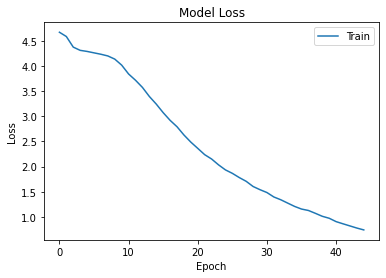

In [16]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train'])
plt.show()

In [17]:
def generate_text(seed_text, next_words, max_sequence_len):
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        predicted = model.predict(token_list, verbose=0)
        predicted_word = tokenizer.index_word[np.argmax(predicted)]
        seed_text += " " + predicted_word
    return seed_text

generated_text = generate_text("Artificial Intelligence", 300, max_sequence_len)
generated_text

'Artificial Intelligence science is an interdisciplinary academic field that uses statistics scientific computing scientific methods processes scientific visualization algorithms and systems to extract or extrapolate knowledge and insights from potentially noisy structured or unstructured data data science also integrates domain knowledge from the underlying application domain eg natural sciences information technology and medicine data science is multifaceted and can be described as a a research a research method a discipline a a workflow and a profession data science is a concept to unify statistics data analysis informatics and their related methods to understand and analyze actual phenomena with data it uses techniques and theories drawn from many fields within the context of mathematics statistics computer science information science and domain knowledge however data science is different from computer science and information science turing award winner jim gray imagined data scien

In [18]:
def save_text_as_pdf(text, pdf_filename):
    # Create instance of FPDF class
    pdf = FPDF()
    pdf.add_page()
    pdf.set_auto_page_break(auto=True, margin=15)
    pdf.set_font("Arial", size=12)

    # Add text to PDF
    pdf.multi_cell(0, 10, text)

    # Save the PDF
    pdf.output(pdf_filename)

# Save the generated text as a PDF
save_text_as_pdf(generated_text, "AI_text.pdf")
